# EDA Highschool

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('students.csv')

## Prise de connaissance des données

In [3]:
df.describe()

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,337.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,197.000000,16.696203,2.749367,2.521519,1.445104,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,114.170924,1.276043,1.094735,1.088201,0.709700,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,98.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,197.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,295.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,394.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
Unnamed: 0    395 non-null int64
school        391 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          343 non-null object
Fjob          345 non-null object
reason        395 non-null object
guardian      381 non-null object
traveltime    337 non-null float64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 

## Gestion des données manquantes

In [5]:
df.isna().sum()

Unnamed: 0     0
school         4
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob          52
Fjob          50
reason         0
guardian      14
traveltime    58
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1             0
G2             0
G3             0
dtype: int64

`Seulement 58 données manquantes sur la colonne traveltime peuvent affecter les résultats`

## Analyse univariée et multivariée

### Analyse internet

#### Données impertinentes

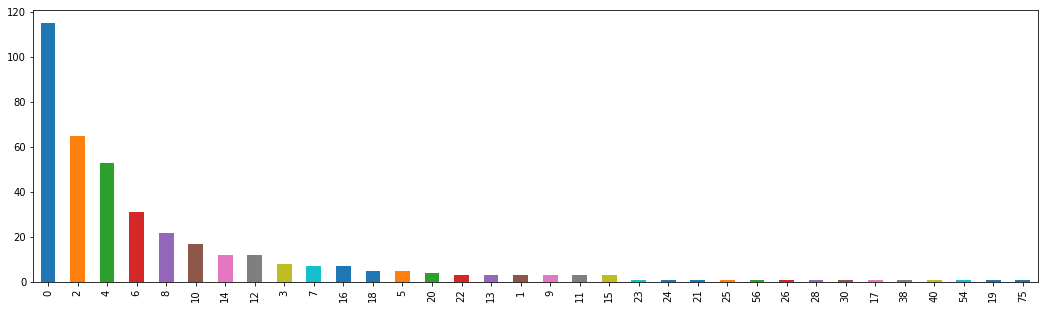

In [6]:
df2 = df.absences.value_counts()
plt.subplots(figsize=(18,5))
df2.plot.bar()

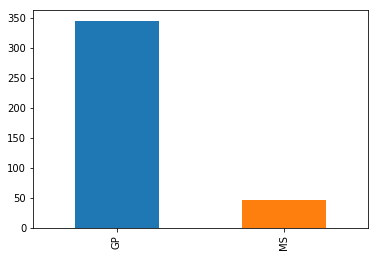

In [7]:
df.school.value_counts().plot.bar()

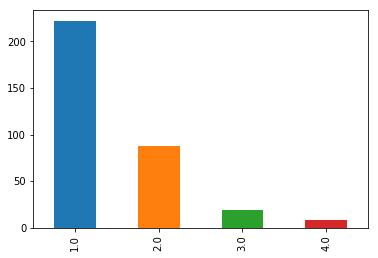

In [28]:
df.traveltime.value_counts().plot.bar()

#### Données pertinentes

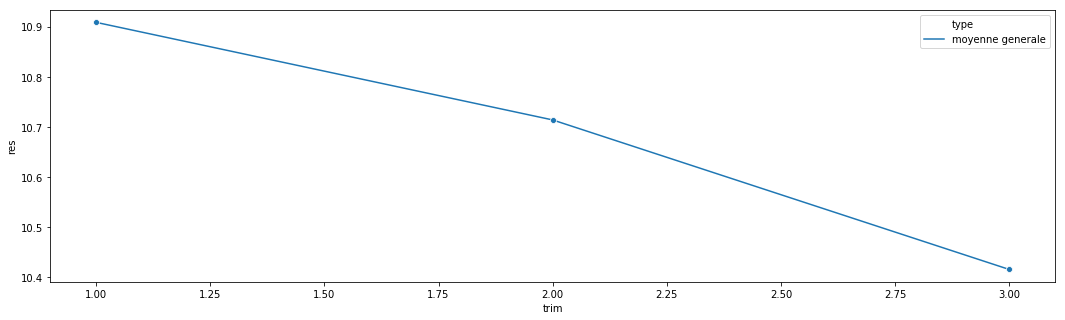

In [8]:
col = ['res', 'type', 'trim']

b = df.loc[:,['G1','G2','G3']]

evo = pd.DataFrame([
    [b.G1.mean(),'moyenne generale',1],
    [b.G2.mean(),'moyenne generale',2],
    [b.G3.mean(),'moyenne generale',3]],
    columns=col)
#print(evo)
plt.subplots(figsize=(18,5))
sns.lineplot(x='trim',y='res',data=evo,hue="type", marker='o')

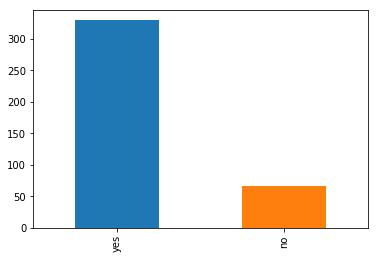

In [9]:
df.internet.value_counts().plot.bar()

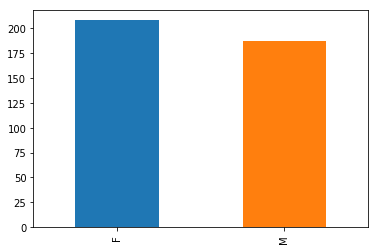

In [10]:
df.sex.value_counts().plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000251FF314DD8>],
      dtype=object)

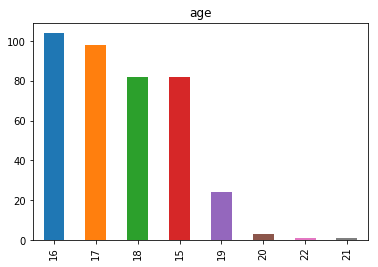

In [11]:
df.age.value_counts().plot(subplots = True, kind = 'bar')

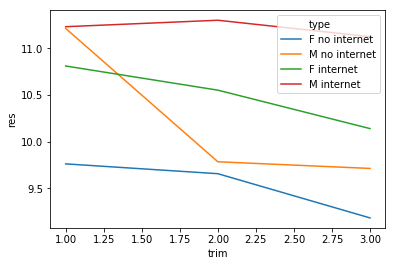

In [12]:
col = ['res', 'type', 'trim']

a1 = df[(df.sex == 'F') & (df.internet == 'no')]
b1 = a1.loc[:,['G1','G2','G3']]

a2 = df[(df.sex == 'M') & (df.internet == 'no')]
b2 = a2.loc[:,['G1','G2','G3']]

a3 = df[(df.sex == 'F') & (df.internet == 'yes')]
b3 = a3.loc[:,['G1','G2','G3']]

a4 = df[(df.sex == 'M') & (df.internet == 'yes')]
b4 = a4.loc[:,['G1','G2','G3']]

evo = pd.DataFrame([
    [b1.G1.mean(),'F no internet',1],
    [b1.G2.mean(),'F no internet',2],
    [b1.G3.mean(),'F no internet',3],
    [b2.G1.mean(),'M no internet',1],
    [b2.G2.mean(),'M no internet',2],
    [b2.G3.mean(),'M no internet',3],
    [b3.G1.mean(),'F internet',1],
    [b3.G2.mean(),'F internet',2],
    [b3.G3.mean(),'F internet',3],
    [b4.G1.mean(),'M internet',1],
    [b4.G2.mean(),'M internet',2],
    [b4.G3.mean(),'M internet',3]],
    columns=col)
#print(evo)
sns.lineplot(x='trim',y='res',data=evo,hue="type")

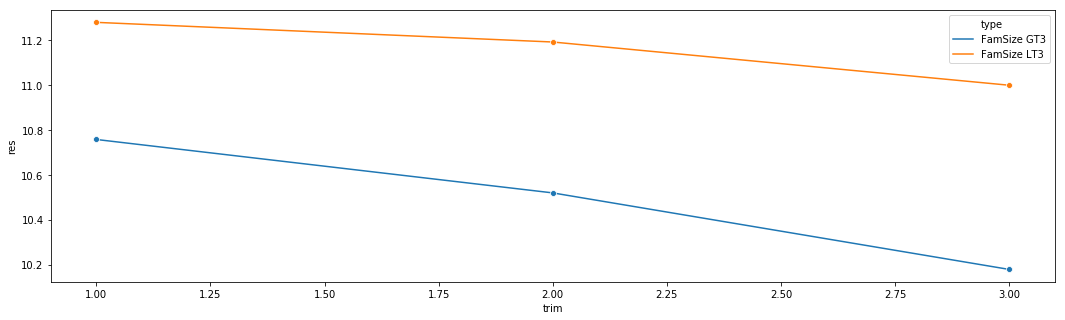

In [13]:
col = ['res', 'type', 'trim']

a1 = df[(df.famsize == 'GT3') ]
b1 = a1.loc[:,['G1','G2','G3']]

a2 = df[(df.famsize == 'LE3') ]
b2 = a2.loc[:,['G1','G2','G3']]

evo = pd.DataFrame([
    [b1.G1.mean(),'FamSize GT3',1],
    [b1.G2.mean(),'FamSize GT3',2],
    [b1.G3.mean(),'FamSize GT3',3],
    [b2.G1.mean(),'FamSize LT3',1],
    [b2.G2.mean(),'FamSize LT3',2],
    [b2.G3.mean(),'FamSize LT3',3]],
    columns=col)
#print(evo)
plt.subplots(figsize=(18,5))
sns.lineplot(x='trim',y='res',data=evo,hue="type", marker='o')

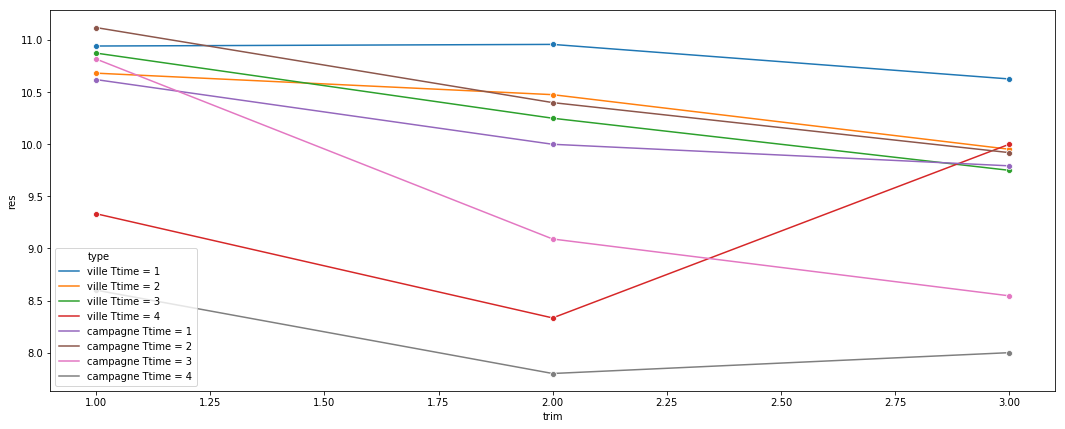

In [14]:
col = ['res', 'type', 'trim']

a1 = df[(df.address == 'U') & (df.traveltime == 1)]
b1 = a1.loc[:,['G1','G2','G3']]

a2 = df[(df.address == 'U') & (df.traveltime == 2)]
b2 = a2.loc[:,['G1','G2','G3']]

a3 = df[(df.address == 'U') & (df.traveltime == 3)]
b3 = a3.loc[:,['G1','G2','G3']]

a4 = df[(df.address == 'U') & (df.traveltime == 4)]
b4 = a4.loc[:,['G1','G2','G3']]

a5 = df[(df.address == 'R') & (df.traveltime == 1)]
b5 = a5.loc[:,['G1','G2','G3']]

a6 = df[(df.address == 'R') & (df.traveltime == 2)]
b6 = a6.loc[:,['G1','G2','G3']]

a7 = df[(df.address == 'R') & (df.traveltime == 3)]
b7 = a7.loc[:,['G1','G2','G3']]

a8 = df[(df.address == 'R') & (df.traveltime == 4)]
b8 = a8.loc[:,['G1','G2','G3']]

evo = pd.DataFrame([
    [b1.G1.mean(),'ville Ttime = 1',1],
    [b1.G2.mean(),'ville Ttime = 1',2],
    [b1.G3.mean(),'ville Ttime = 1',3],
    [b2.G1.mean(),'ville Ttime = 2',1],
    [b2.G2.mean(),'ville Ttime = 2',2],
    [b2.G3.mean(),'ville Ttime = 2',3],
    [b3.G1.mean(),'ville Ttime = 3',1],
    [b3.G2.mean(),'ville Ttime = 3',2],
    [b3.G3.mean(),'ville Ttime = 3',3],
    [b4.G1.mean(),'ville Ttime = 4',1],
    [b4.G2.mean(),'ville Ttime = 4',2],
    [b4.G3.mean(),'ville Ttime = 4',3],
    [b5.G1.mean(),'campagne Ttime = 1',1],
    [b5.G2.mean(),'campagne Ttime = 1',2],
    [b5.G3.mean(),'campagne Ttime = 1',3],
    [b6.G1.mean(),'campagne Ttime = 2',1],
    [b6.G2.mean(),'campagne Ttime = 2',2],
    [b6.G3.mean(),'campagne Ttime = 2',3],
    [b7.G1.mean(),'campagne Ttime = 3',1],
    [b7.G2.mean(),'campagne Ttime = 3',2],
    [b7.G3.mean(),'campagne Ttime = 3',3],
    [b8.G1.mean(),'campagne Ttime = 4',1],
    [b8.G2.mean(),'campagne Ttime = 4',2],
    [b8.G3.mean(),'campagne Ttime = 4',3]],
    columns=col)
#print(evo)()
plt.subplots(figsize=(18,7))
sns.lineplot(x='trim',y='res',data=evo,hue="type", marker='o')

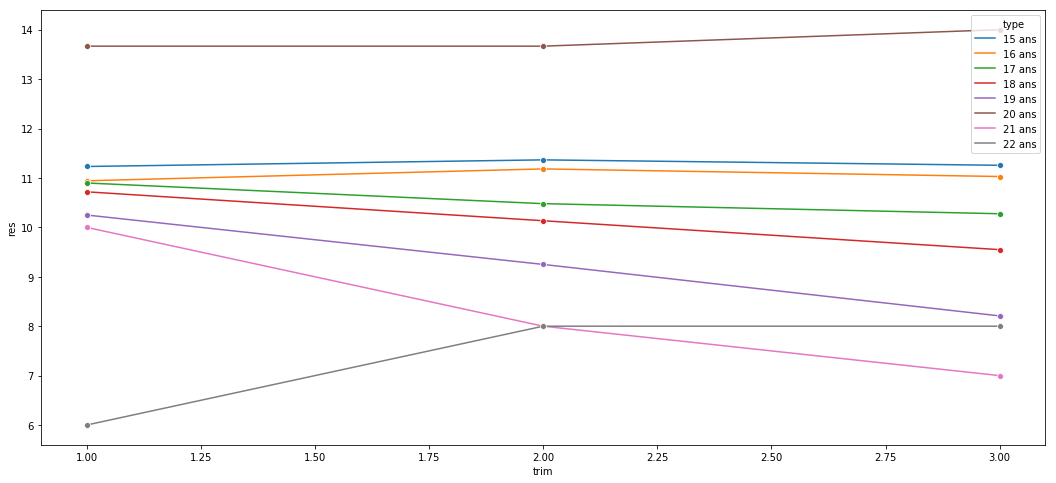

In [15]:
col2 = ['res', 'type', 'trim']

a1 = df[df.age == 15]
b1 = a1.loc[:,['G1','G2','G3']]

a2 = df[df.age == 16]
b2 = a2.loc[:,['G1','G2','G3']]

a3 = df[df.age == 17]
b3 = a3.loc[:,['G1','G2','G3']]

a4 = df[df.age == 18]
b4 = a4.loc[:,['G1','G2','G3']]

a5 = df[df.age == 19]
b5 = a5.loc[:,['G1','G2','G3']]

a6 = df[df.age == 20]
b6 = a6.loc[:,['G1','G2','G3']]

a7 = df[df.age == 21]
b7 = a7.loc[:,['G1','G2','G3']]

a8 = df[df.age == 22]
b8 = a8.loc[:,['G1','G2','G3']]

evo2 = pd.DataFrame([
    [b1.G1.mean(),'15 ans',1],
    [b1.G2.mean(),'15 ans',2],
    [b1.G3.mean(),'15 ans',3],
    [b2.G1.mean(),'16 ans',1],
    [b2.G2.mean(),'16 ans',2],
    [b2.G3.mean(),'16 ans',3],
    [b3.G1.mean(),'17 ans',1],
    [b3.G2.mean(),'17 ans',2],
    [b3.G3.mean(),'17 ans',3],
    [b4.G1.mean(),'18 ans',1],
    [b4.G2.mean(),'18 ans',2],
    [b4.G3.mean(),'18 ans',3],
    [b5.G1.mean(),'19 ans',1],
    [b5.G2.mean(),'19 ans',2],
    [b5.G3.mean(),'19 ans',3],
    [b6.G1.mean(),'20 ans',1],
    [b6.G2.mean(),'20 ans',2],
    [b6.G3.mean(),'20 ans',3],
    [b7.G1.mean(),'21 ans',1],
    [b7.G2.mean(),'21 ans',2],
    [b7.G3.mean(),'21 ans',3],
    [b8.G1.mean(),'22 ans',1],
    [b8.G2.mean(),'22 ans',2],
    [b8.G3.mean(),'22 ans',3]],
    columns=col2)
#print(evo)
plt.subplots(figsize=(18,8))
sns.lineplot(x='trim',y='res',data=evo2,hue="type",marker='o')

c:\users\clemence\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\clemence\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\clemence\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which

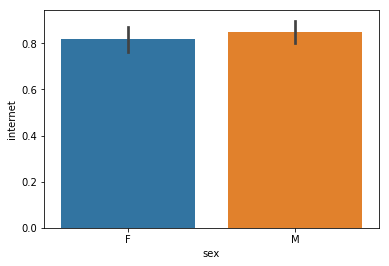

In [23]:
df.internet[df['internet']=='yes'] = 1
df.internet[df['internet']=='no'] = 0

sns.barplot(x ='sex',y ='internet',data=df)


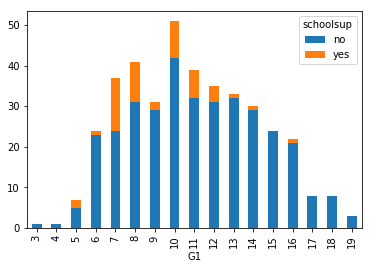

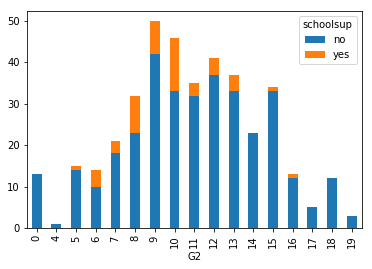

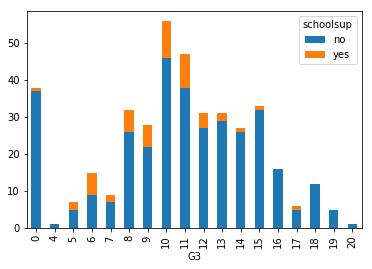

In [21]:
dfo = df.groupby('G1').schoolsup.value_counts().sort_index().unstack()
dfo.plot.bar(stacked=True)

dfo2 = df.groupby('G2').schoolsup.value_counts().sort_index().unstack()
dfo2.plot.bar(stacked=True)

dfo3 = df.groupby('G3').schoolsup.value_counts().sort_index().unstack()
dfo3.plot.bar(stacked=True)

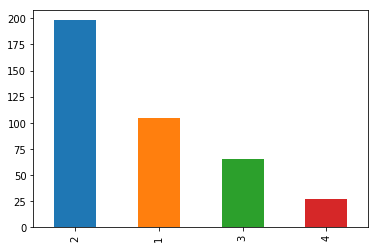

In [29]:
df.studytime.value_counts().plot.bar()

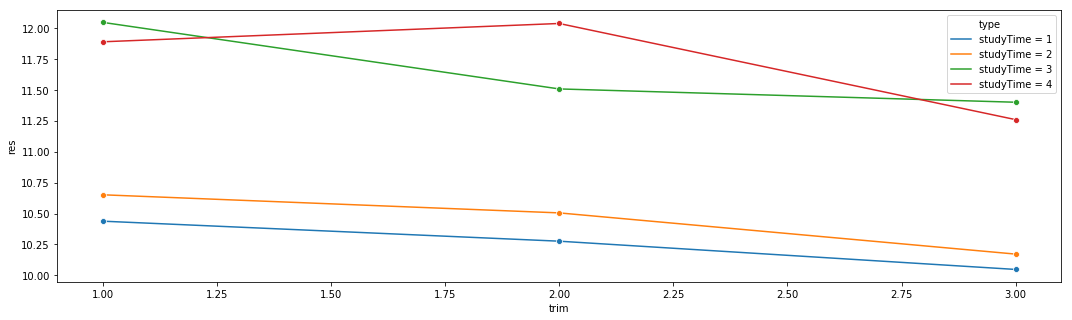

In [30]:
col = ['res', 'type', 'trim']

a1 = df[(df.studytime == 1)]
b1 = a1.loc[:,['G1','G2','G3']]

a2 = df[(df.studytime == 2)]
b2 = a2.loc[:,['G1','G2','G3']]

a3 = df[(df.studytime == 3)]
b3 = a3.loc[:,['G1','G2','G3']]

a4 = df[(df.studytime == 4)]
b4 = a4.loc[:,['G1','G2','G3']]

evo = pd.DataFrame([
    [b1.G1.mean(),'studyTime = 1',1],
    [b1.G2.mean(),'studyTime = 1',2],
    [b1.G3.mean(),'studyTime = 1',3],
    [b2.G1.mean(),'studyTime = 2',1],
    [b2.G2.mean(),'studyTime = 2',2],
    [b2.G3.mean(),'studyTime = 2',3],
    [b3.G1.mean(),'studyTime = 3',1],
    [b3.G2.mean(),'studyTime = 3',2],
    [b3.G3.mean(),'studyTime = 3',3],
    [b4.G1.mean(),'studyTime = 4',1],
    [b4.G2.mean(),'studyTime = 4',2],
    [b4.G3.mean(),'studyTime = 4',3]],
    columns=col)
#print(evo)
plt.subplots(figsize=(18,5))
sns.lineplot(x='trim',y='res',data=evo,hue="type", marker='o')

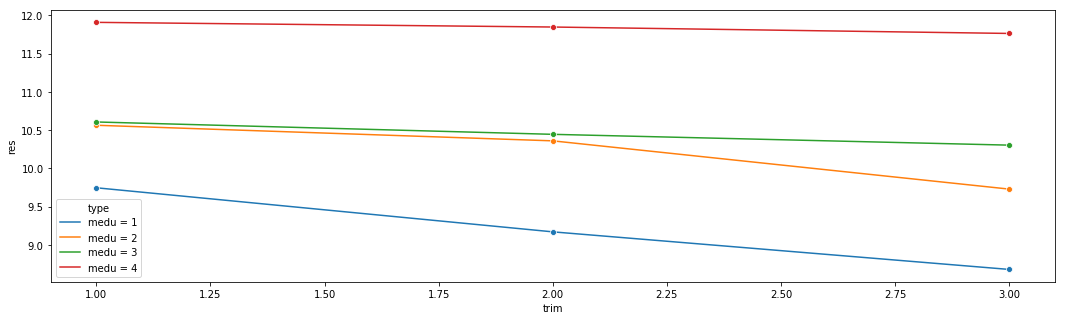

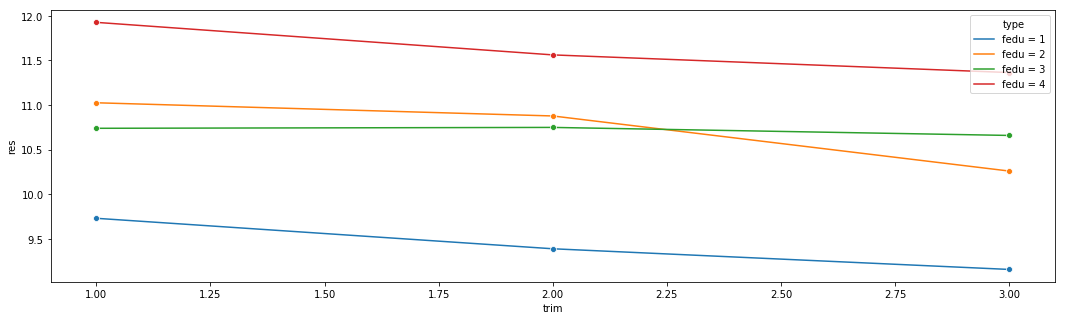

In [25]:
col = ['res', 'type', 'trim']

a1 = df[(df.Medu == 1)]
b1 = a1.loc[:,['G1','G2','G3']]

a2 = df[(df.Medu == 2)]
b2 = a2.loc[:,['G1','G2','G3']]

a3 = df[(df.Medu == 3)]
b3 = a3.loc[:,['G1','G2','G3']]

a4 = df[(df.Medu == 4)]
b4 = a4.loc[:,['G1','G2','G3']]

evo = pd.DataFrame([
    [b1.G1.mean(),'medu = 1',1],
    [b1.G2.mean(),'medu = 1',2],
    [b1.G3.mean(),'medu = 1',3],
    [b2.G1.mean(),'medu = 2',1],
    [b2.G2.mean(),'medu = 2',2],
    [b2.G3.mean(),'medu = 2',3],
    [b3.G1.mean(),'medu = 3',1],
    [b3.G2.mean(),'medu = 3',2],
    [b3.G3.mean(),'medu = 3',3],
    [b4.G1.mean(),'medu = 4',1],
    [b4.G2.mean(),'medu = 4',2],
    [b4.G3.mean(),'medu = 4',3]],
    columns=col)
#print(evo)
plt.subplots(figsize=(18,5))
sns.lineplot(x='trim',y='res',data=evo,hue="type", marker='o')

col = ['res', 'type', 'trim']

a1 = df[(df.Fedu == 1)]
b1 = a1.loc[:,['G1','G2','G3']]

a2 = df[(df.Fedu == 2)]
b2 = a2.loc[:,['G1','G2','G3']]

a3 = df[(df.Fedu == 3)]
b3 = a3.loc[:,['G1','G2','G3']]

a4 = df[(df.Fedu == 4)]
b4 = a4.loc[:,['G1','G2','G3']]

evo = pd.DataFrame([
    [b1.G1.mean(),'fedu = 1',1],
    [b1.G2.mean(),'fedu = 1',2],
    [b1.G3.mean(),'fedu = 1',3],
    [b2.G1.mean(),'fedu = 2',1],
    [b2.G2.mean(),'fedu = 2',2],
    [b2.G3.mean(),'fedu = 2',3],
    [b3.G1.mean(),'fedu = 3',1],
    [b3.G2.mean(),'fedu = 3',2],
    [b3.G3.mean(),'fedu = 3',3],
    [b4.G1.mean(),'fedu = 4',1],
    [b4.G2.mean(),'fedu = 4',2],
    [b4.G3.mean(),'fedu = 4',3]],
    columns=col)
#print(evo)
plt.subplots(figsize=(18,5))
sns.lineplot(x='trim',y='res',data=evo,hue="type", marker='o')

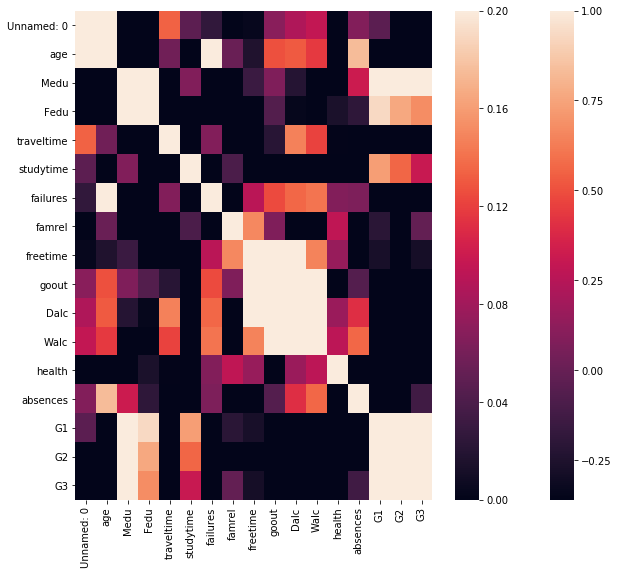

In [26]:
plt.subplots(figsize=(10,9))
sns.heatmap(df.corr())
sns.heatmap(df.corr(),vmin=0,vmax=0.2)

# CONCLUSION